In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define the grid
x = np.linspace(0, 120, 121)  # X-axis from 0 to 120 with a step of 1
y = np.linspace(0, 53.3, 54)  # Y-axis from 0 to 53.3 with a step of 1
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Parameters for the Gaussian peak (mean, covariance matrix)
mean = [60, 26.65]  # Centered for now
# Just some initial values for the covariance
covariance = [[300, 0], [0, 100]]

In [2]:
# Function to normalize
# the Z values so that they sum to 1 (since they represent probabilities)
def normalize(z):
    return z / np.sum(z)

In [3]:
# Function to generate a shifting peak over 50 frames
def generate_shifting_peak(frames=50):
    peak_data = []

    # Randomly generate direction and magnitude of shift
    # Direction vector with components in range [-1, 1]
    shift_direction = np.random.rand(2) * 2 - 1
    # Magnitude of shift, up to 0.5 per frame
    shift_magnitude = np.random.rand() * 0.5

    for frame in range(frames):
        # Calculate the shift for this frame
        shift = shift_direction * frame * shift_magnitude
        current_mean = np.array(mean) + shift

        # Generate the Gaussian peak
        Z = multivariate_normal.pdf(pos, mean=current_mean, cov=covariance)
        Z_normalized = normalize(Z)

        peak_data.append(Z_normalized)

    return peak_data

In [4]:
# Generate the data
data = generate_shifting_peak()

In [5]:
def visualize_data(data, frame):
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, data[frame], cmap='viridis')

    # Set labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Probability')

    # Set title
    plt.title(f'Frame {frame + 1}')

    plt.show()

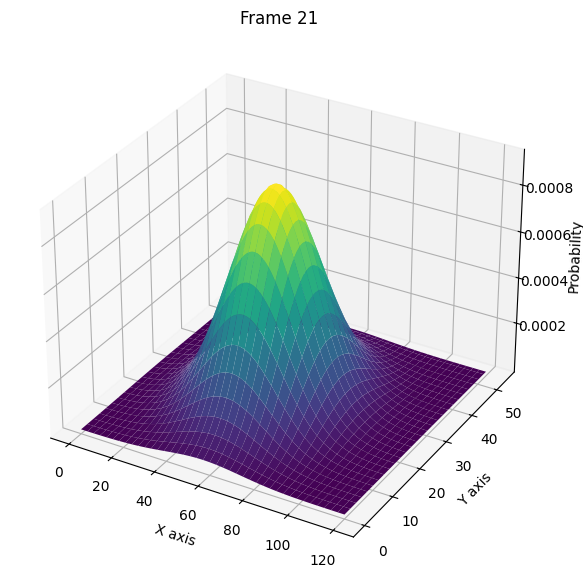

In [6]:
# Visualize the first frame to check
visualize_data(data, 20)